
INF200 Lecture No 7
===================

***Hans Ekkehard Plesser, NMBU, 25 October 2021***

# Today's topics

* Representing data — repetition
* Towards object-oriented programming
    - Simulating [Chutes & Ladders](https://en.wikipedia.org/wiki/Snakes_and_ladders)
    - Initial code and critique
    - Separation of concerns
    - Representing information as records
    - Introducing classes
    - Evolving our simulation

----

# Representing data: Overview

- We need to organize data in our code to work with it
    - Keep control: is that value the temperature at noon or the wind speed at midnight?
    - Select data according to different criteria: by name, by location, ...
    - Exchange data between different parts of a large program
    - Perform operations efficiently on large data
- Keeping control is essential
    - If we lose control of what is what, our code will produce incorrect results
    - Wrong results are worse than no results: if the program crashes, we at least know something is wrong!
- Code lives long and passes through many hands
    - Code should be self-documenting
    - Data should be self-documenting

### Records and fields

- Our student data contains one [record](https://en.wikipedia.org/wiki/Record_(computer_science)) per student.
    - A record comprises information about an entity, e.g., one student.
    - If we had student data in a spreasheet, a record would usually be a row.
    - Standard databases also store records in rows.
    - If we used cardboard cards, we would have one card per student as record.
- Each record has one or more [fields](https://en.wikipedia.org/wiki/Field_(computer_science))
    - A field contains a single piece of information, e.g., family name, phone number, etc.
    - In a spreadsheet or database, fields correspond to columns.
    - On a cardboard card, for each field we would have a box to fill in the data.
- When representing students as a list of dictionaries
    - each dictionary is the record for one student, and
    - dictionary entries map field names to field entries.

In [6]:
students = [{'given_name': 'Per', 
             'family_name': 'Olsen', 
             'programme': 'M-DV', 
             'courses': ['INF200', 'INF221', 'INF250']},
            {'given_name': 'Kari', 
             'family_name': 'Hansen', 
             'programme': 'M-TDV', 
             'courses': ['DAT300', 'DAT390', 'FYS388']}]

------

# Towards object-oriented programming

- Invented in the 1960s **in Norway** to program simulations
- First OO language: [Simula](https://en.wikipedia.org/wiki/Simula) by [Kristen Nygaard](https://en.wikipedia.org/wiki/Kristen_Nygaard) and [Ole-Johan Dahl](https://en.wikipedia.org/wiki/Ole-Johan_Dahl)
<img src="NygaardDahl.jpg" width="60%">

## Simulating Chutes & Ladders ("Stigespillet")

<img src="simple_board.png" width="60%">

### Rules
- Player starts on square 0 (not on board, to left of square 1)
- Roll six-sided die and move accordingly
    - Climb ladder immediately if move ends on green field
    - Slide down ladder immediately if move ends on orange field
- Game ends when goal reached
- If multiple players, game ends immediately when first player reaches goal

### Question
- How are game durations distributed?

### Approach
- Simulate many games and collect statistics

## Initial code and critique

- Below is an initial imlpementation of a Chutes & Ladders simulation for a single player.

Shortest game duration:    3
Mean game duration    :    7.8 ± 3.4
Longest game duration :   25


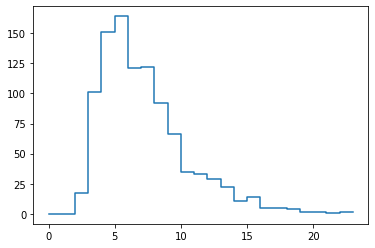

In [19]:
# %load chutes_initial.py
import random
import matplotlib.pyplot as plt
import numpy as np

random.seed(12345679)

res = []

for _ in range(1000):
    s = 0
    p = 0
    while p < 25:
        p += random.randint(1, 6)
        if p == 1:
            p = 12
        elif p == 13:
            p = 22
        elif p == 14:
            p = 3
        elif p == 20:
            p = 8
        s += 1
    res.append(s)

print(f'Shortest game duration: {min(res):4d}')
print(f'Mean game duration    : {np.mean(res):6.1f} ± {np.std(res):.1f}')
print(f'Longest game duration : {max(res):4d}')

hv, hb = np.histogram(res, bins=np.arange(0, max(res)))
plt.step(hb[:-1], hv)
plt.show()

### Code critique

Discuss the solution above with you neighbor. Possible questions include:

- Is the code clear and comprehensible?
- What would we need to do to simulate a different board?
- Can we be sure that the code is correct? How could we test it?
- Why does the code return different results on each execution?

## Separation of concerns

- Programming requires us to keep control
    - Split larger problems into smaller parts
    - Solve each part separately
    - Be explicit about assumptions for each part
- What are the parts of a Chutes & Ladders simulation?
    - The individual player (figure)
    - The game board
    - One game
    - A complete simulation experiment

### Revise code to divide simulation into parts

Live coding in PyCharm: see `chutes_functions.py`.

## Representing information as records

- What properties do the different parts of a Chutes & Ladders simulation have?
    - Player
        - position
        - number of steps
    - Board
        - goal
        - ladders and chutes
    - Game
        - player(s)
        - board
    - Experiment
        - random seed
        - results
        
- Represent each part by a record, each property by a field
- Use `dict`s to represent records
    - Do this only for player for now

### Revise code to represent data as records

Live coding in PyCharm: se `chutes_funcs_recs.py`

### Extend code to simulate a game with multiple players

## Introducing classes

- Record-based solution keeps data together, but
    - records need to be moved around
    - code handling records can be spread
    - code handling on part of the problem can be spread
- Key idea in object-oriented programming
    - Collect data describing a given part of a problem and operations on this data into one unit.
    - This unit is a *class*: A description of data *fields* and *methods* (functions) to work on them.
    - Can be thought of as "dictionary with custom functions"
        - e.g. player "dictionary" with a move function working on the dict
    - A class is a data type: it defines rules 
    - Acutal records are called *instances* (or *objects*)
- Keeping control
    - Create each instance in a consistent state
    - Each method
        - relies on instance being in a consistent state when it starts
        - guarantees that instant is in a consistent state when it finishes
    - We can check every method on its own!
    
### Revise code to a class-based implementation
- Create a class for each concept with a field for relevant data
    - Player
        - Fields (data)
            - position
            - step
        - Methods (operations)
            - move
    - Board
        - Fields
        - Methods
    - Game
        - Fields
        - Methods
    - Experiment
        - Fields
        - Methods

- Live programming in PyCharm: see `chutes_classes.py` (`Player` class only)

## Evolving the simulation (to do)

- Extend the simulation with new features
    - Different types of boards
        - flexible goal location
        - flexible chutes and ladders
        - blocking goal (must hit goal exactly, else stay in place)
        - reflecting goal (move all eyes rolled, turning around at goal if necessary)
    - Different types of players
        - player makes extra steps next time after going up a ladder
        - player makes fewer steps next time after going up a ladder
        - ...
- Some new features just require different values in existing fields
- Other features require modified behavior, i.e., modified methods
- This can be implemented in *subclasses*
    - *inherit* common data and behavior from *superclass*
    - add or replace methods to implement different behavior
- Live coding in PyCharm